In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir=r"/kaggle/input/resized-handwritten-signature-verification-224x224"

In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=100

#pre=processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

FileNotFoundError: ignored

In [ ]:
import os
import matplotlib.pyplot as plt

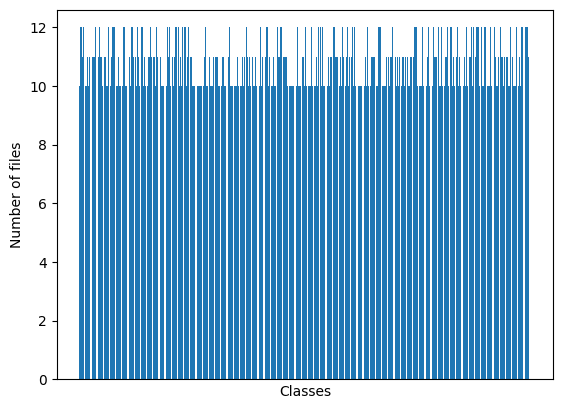

In [ ]:
import os
import matplotlib.pyplot as plt

folder_path = '/kaggle/input/resized-handwritten-signature-verification-224x224'

# Get a list of all subdirectories in the specified path
subdirs = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]

# Sort the subdirectories to ensure consistent numbering
subdirs.sort()

# Count the number of files in each subdirectory
num_files = [len(os.listdir(os.path.join(folder_path, subdir))) for subdir in subdirs]

# Plot the number of files in each subdirectory without showing x-axis ticks
plt.bar(range(1, len(subdirs) + 1), num_files)
plt.xlabel('Classes')

plt.ylabel('Number of files')
plt.xticks([])  # Removes x-axis ticks
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

In [ ]:
# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(524, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Print a summary of the model architecture
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 222, 222, 32)      128       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 109, 109, 64)     

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Set the paths to save the best models
model_save_path_val_acc = '/kaggle/working/best_model_val_acc.h5'
model_save_path_train_acc = '/kaggle/working/best_model_train_acc.h5'

# Set up ModelCheckpoint to save the best models based on validation and training accuracy
checkpoint_val_acc = ModelCheckpoint(model_save_path_val_acc,
                                     monitor='val_accuracy',
                                     save_best_only=True,
                                     mode='max',
                                     verbose=1)

checkpoint_train_acc = ModelCheckpoint(model_save_path_train_acc,
                                       monitor='accuracy',
                                       save_best_only=True,
                                       mode='max',
                                       verbose=1)

# Assuming you have a train_data_gen and val_data_gen for your data generators
history = model.fit(train_datagen, epochs=100, validation_data=test_datagen, callbacks=[checkpoint_val_acc, checkpoint_train_acc])

Epoch 1/100
52/52 [==============================] - ETA: 0s - loss: 6.2158 - accuracy: 0.0078
Epoch 1: val_accuracy improved from -inf to 0.00191, saving model to /kaggle/working/best_model_val_acc.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: accuracy improved from -inf to 0.00781, saving model to /kaggle/working/best_model_train_acc.h5
52/52 [==============================] - 117s 2s/step - loss: 6.2158 - accuracy: 0.0078 - val_loss: 6.3168 - val_accuracy: 0.0019
Epoch 2/100
52/52 [==============================] - ETA: 0s - loss: 5.3224 - accuracy: 0.0332
Epoch 2: val_accuracy did not improve from 0.00191

Epoch 2: accuracy improved from 0.00781 to 0.03318, saving model to /kaggle/working/best_model_train_acc.h5
52/52 [==============================] - 80s 2s/step - loss: 5.3224 - accuracy: 0.0332 - val_loss: 7.0038 - val_accuracy: 0.0019
Epoch 3/100
52/52 [==============================] - ETA: 0s - loss: 4.7378 - accuracy: 0.0691
Epoch 3: val_accuracy did not improve from 0.00191

Epoch 3: accuracy improved from 0.03318 to 0.06909, saving model to /kaggle/working/best_model_train_acc.h5
52/52 [==============================] - 81s 2s/step - loss: 4.7378 - accuracy: 0.0691 - val_loss: 7.6631 - val_accuracy: 0.0

Visualization of Filters inside the First Conv

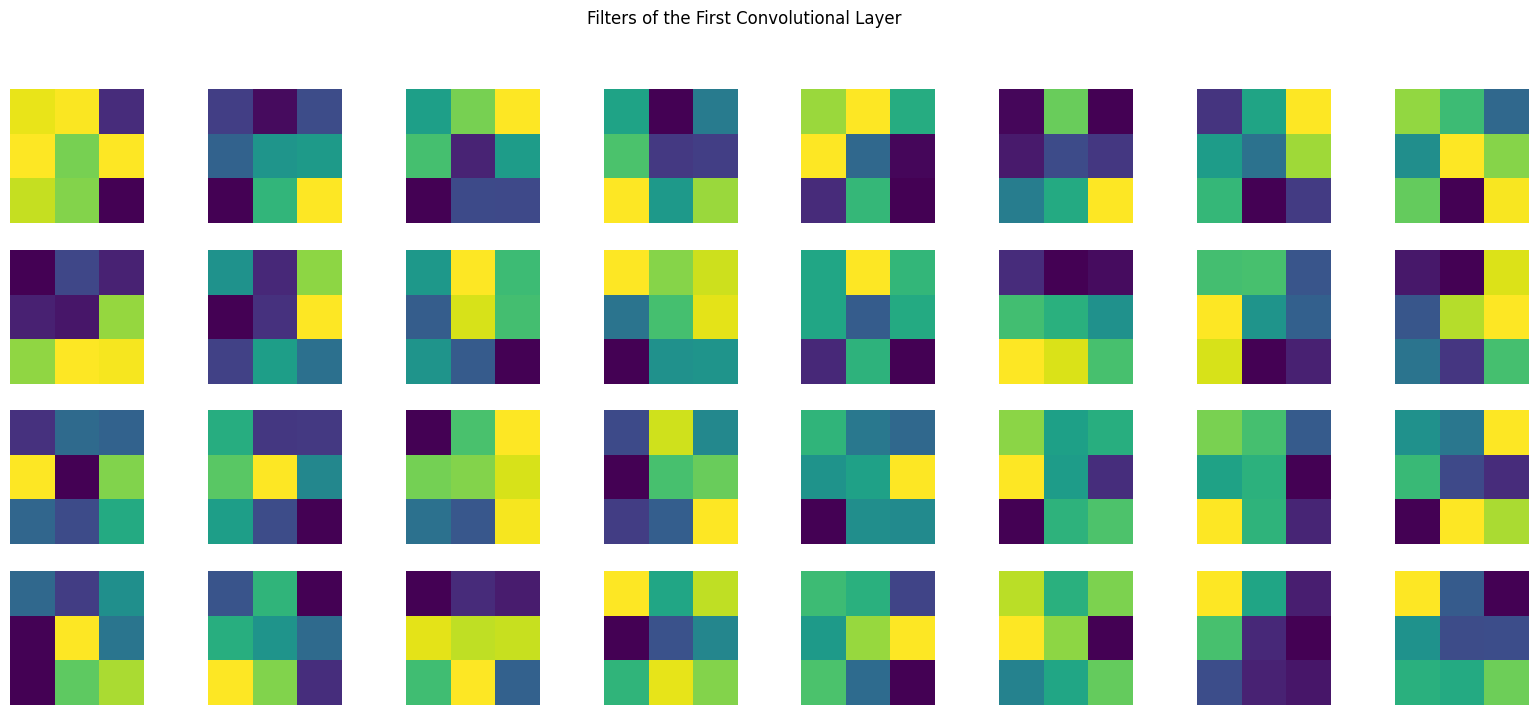

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load your trained model (replace 'your_model.h5' with the actual path to your model file)
model = load_model('/content/drive/MyDrive/best_model2_train_acc.h5')

# Get the weights of the first convolutional layer
first_conv_layer = model.layers[0]  # Assuming the first layer is convolutional
filters, biases = first_conv_layer.get_weights()

# Normalize filter values to range 0-1 for visualization
filters = (filters - np.min(filters)) / (np.max(filters) - np.min(filters))

# Number of filters in the first convolutional layer
num_filters = filters.shape[3]

# Plot the filters
plt.figure(figsize=(20, 8))
for i in range(num_filters):
    plt.subplot(4, num_filters // 4, i + 1)
    plt.imshow(filters[:, :, 0, i], cmap='viridis')  # Assuming grayscale filters
    plt.axis('off')

plt.suptitle('Filters of the First Convolutional Layer')
plt.show()


Run Aa picture inside the model and plot the features learned


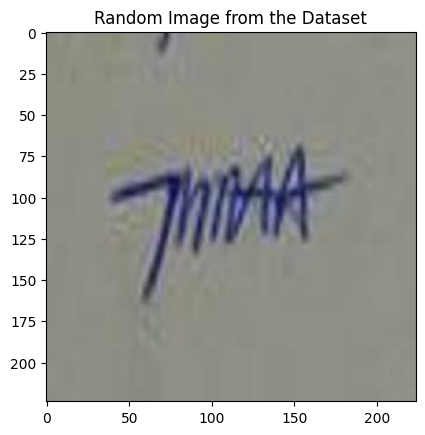

1/1 [==============================] - 0s 291ms/step


/tmp/ipykernel_47/3723038465.py:49: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()
/tmp/ipykernel_47/3723038465.py:52: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0, 255).astype('uint8')


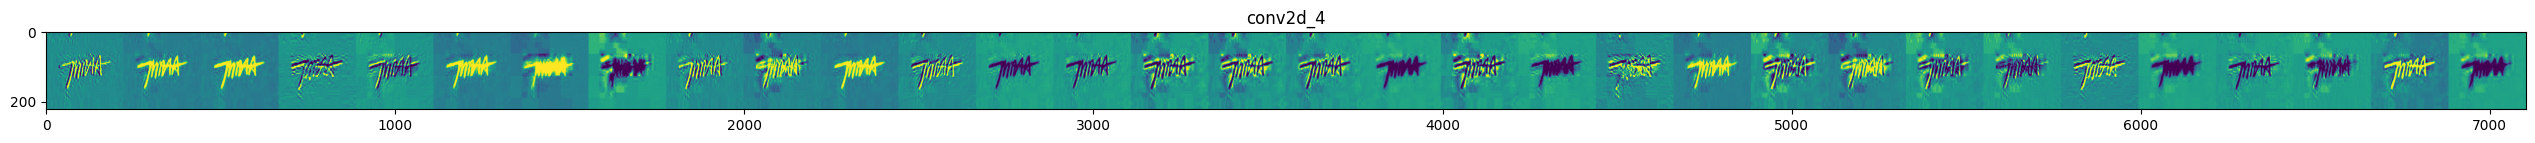

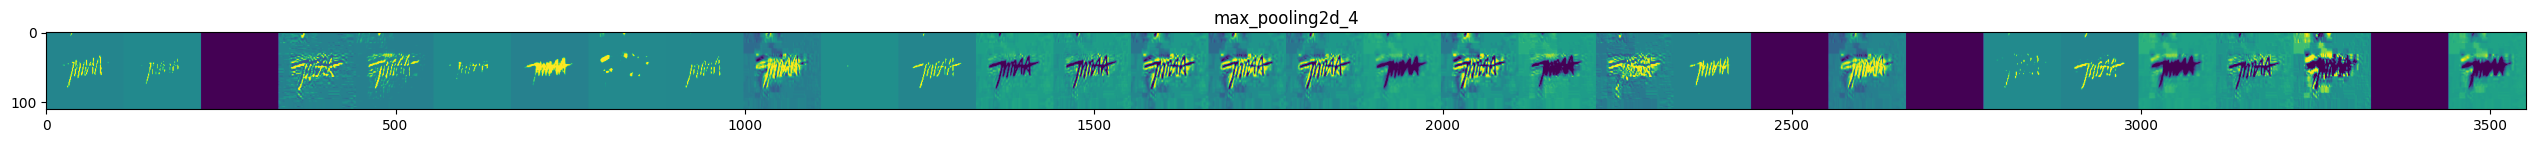

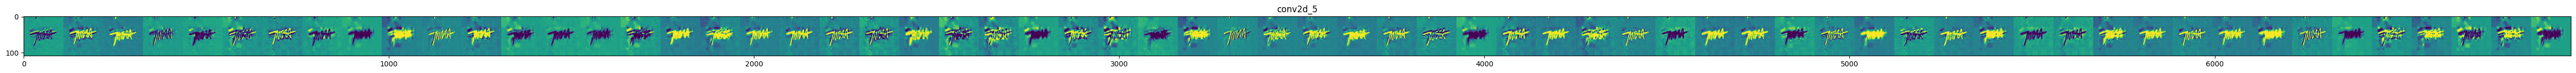

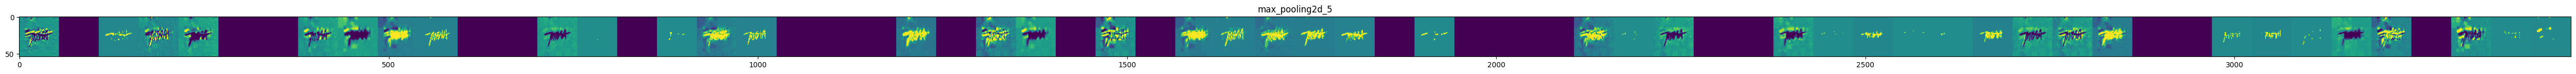

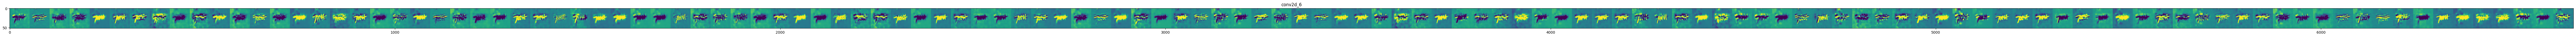

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model, Model

# Load your trained model (replace 'your_model.h5' with the actual path to your model file)
model = load_model('/kaggle/working/best_model_train_acc.h5')

# Choose a random class from the dataset (replace 'your_dataset_path' with the actual path to your dataset)
dataset_path = '/kaggle/input/resized-handwritten-signature-verification-224x224'
random_class = np.random.choice(os.listdir(dataset_path))

# Get all image files in the randomly chosen class
class_path = os.path.join(dataset_path, random_class)
image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Choose a random image from the class
random_image_filename = np.random.choice(image_files)
random_image_path = os.path.join(class_path, random_image_filename)

# Load and plot the random image
img = image.load_img(random_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
plt.imshow(img_array[0] / 255.0)
plt.title('Random Image from the Dataset')
plt.show()

# Define a new model that outputs the activations of intermediate layers
layer_outputs = [layer.output for layer in model.layers[:10]]  # Adjust the range to visualize different layers
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Get the activations for the random image
activations = activation_model.predict(img_array)

# Plot the activations for each layer
layer_names = [layer.name for layer in model.layers[:10]]  # Adjust the range to visualize different layers

for layer_name, layer_activation in zip(layer_names, activations):
    if 'conv' in layer_name or 'pool' in layer_name:
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        display_grid = np.zeros((size, size * n_features))

        for i in range(n_features):
            channel_image = layer_activation[0, :, :, i]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')  # Adjust the colormap based on your preference

plt.show()


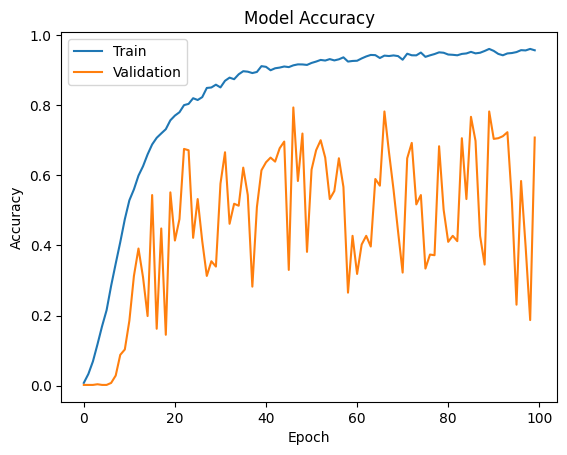

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

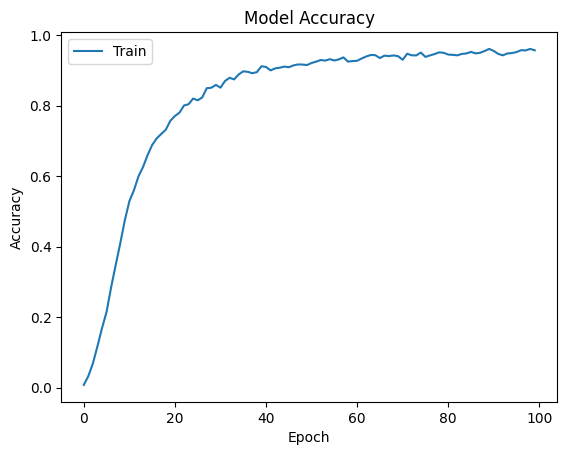

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Train another model in all the data with no split

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 100

# Define the base directory of your dataset
base_dir = '/kaggle/input/resized-handwritten-signature-verification-224x224'

# Define the training data generator without validation split
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Generate the training data flow from the directory
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Adjust the class mode based on your problem (e.g., 'binary' for binary classification)
    shuffle=True,  # You can set shuffle to True or False based on your preference
)



Found 5648 images belonging to 524 classes.


In [ ]:
# Create a Sequential model
model2 = Sequential()

# Add layers to the model
model2.add(Conv2D(32, kernel_size=(3, 3), input_shape=(224, 224, 3)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, kernel_size=(3, 3)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, kernel_size=(3, 3)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(256, kernel_size=(3, 3)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(256))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(524, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Print a summary of the model architecture
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_18 (Ba  (None, 222, 222, 32)      128       
 tchNormalization)                                               
                                                                 
 activation_18 (Activation)  (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_19 (Ba  (None, 109, 109, 64)     

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Set the path to save the best model based on training accuracy
model_save_path_train_acc = '/kaggle/working/best_model2_train_acc.h5'

# Set up ModelCheckpoint to save the best model based on training accuracy
checkpoint_train_acc = ModelCheckpoint(model_save_path_train_acc,
                                       monitor='accuracy',
                                       save_best_only=True,
                                       mode='max',
                                       verbose=1)

# Assuming you have a train_data_gen for your data generator
history2 = model2.fit(train_generator, epochs=100, callbacks=[checkpoint_train_acc])

Epoch 1/100
57/57 [==============================] - ETA: 0s - loss: 0.1153 - accuracy: 0.9633
Epoch 1: accuracy improved from -inf to 0.96335, saving model to /kaggle/working/best_model2_train_acc.h5
57/57 [==============================] - 93s 2s/step - loss: 0.1153 - accuracy: 0.9633
Epoch 2/100
57/57 [==============================] - ETA: 0s - loss: 0.1100 - accuracy: 0.9630
Epoch 2: accuracy did not improve from 0.96335
57/57 [==============================] - 88s 2s/step - loss: 0.1100 - accuracy: 0.9630
Epoch 3/100
57/57 [==============================] - ETA: 0s - loss: 0.1240 - accuracy: 0.9619
Epoch 3: accuracy did not improve from 0.96335
57/57 [==============================] - 88s 2s/step - loss: 0.1240 - accuracy: 0.9619
Epoch 4/100
57/57 [==============================] - ETA: 0s - loss: 0.1111 - accuracy: 0.9633
Epoch 4: accuracy did not improve from 0.96335
57/57 [==============================] - 87s 2s/step - loss: 0.1111 - accuracy: 0.9633
Epoch 5/100
57/57 [======